# Common Practice: Neural Networks

In [3]:
!pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.0 MB 5.9 MB/s eta 0:01:05
   ---------------------------------------- 0.9/385.0 MB 11.2 MB/s eta 0:00:35
   ---------------------------------------- 1.9/385.0 MB 15.5 MB/s eta 0:00:25
   ---------------------------------------- 3.5/385.0 MB 20.3 MB/s eta 0:00:19
    --------------------------------------- 5.1/385.0 MB 23.1 MB/s eta 0:00:17
    --------------------------------------- 6.4/385.0 MB 24.0 MB/s eta 0:00:16
    --------------------------------------- 7.6/385.0 MB 24.1 MB/s eta 0:00:16
    --------------------------------------- 8.1/385.0 MB 24.6 MB/s eta 0:00:16
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Libraries

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

### Load and prepare the dataset

In [12]:
data = pd.read_csv('Housing.csv')

In [13]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Preprocessing

### Define Features and Target Variable

In [14]:
target = 'price'
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

### Categorical Encoding

In [15]:
# Apply get_dummies to create dummy variables for categorical features
data = pd.get_dummies(data, drop_first=True)

### Feature Verification

In [16]:
# Verify the feature names after dummy variable creation
  # all columns except the target
updated_features = data.columns.difference([target])

### Split Data into Training and Testing Sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data[updated_features], data[target], test_size=0.2, random_state=42)

###  Normalize Features

In [18]:
# Normalize the features using Standard Scalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

### Build and Compile the Neural Network

In [19]:
# Build the Neural Networks
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\yashp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Set Early Stopping and Train the Model

In [20]:
# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, callbacks=[early_stopping])

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 24824499929088.0000 - val_loss: 30129977819136.0000
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27214466777088.0000 - val_loss: 30129925390336.0000
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26807801741312.0000 - val_loss: 30129778589696.0000
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24062340366336.0000 - val_loss: 30129464016896.0000
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25339698872320.0000 - val_loss: 30128855842816.0000
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25111235133440.0000 - val_loss: 30127845015552.0000
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25188861214720.0000 - val_loss: 30126351843328.0000
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25036459081728.0000 - val_loss: 30124258885632.0000
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24148329889792.0000 - val_loss: 30121478062080.0000
E

# Model Evaluation

### Evaluate the model on the test set

In [21]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21376624754688.0000 
Test Loss: 22695383138304.0


In [22]:
# Make predictions
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


### Make Predictions and Calculate Metrics

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import numpy as np
import seaborn as sns

# Calculate predictions
predictions = model.predict(X_test)

# Ensure predictions are a 1D array
predictions = predictions.flatten()

# Calculate additional error metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
rmsle = np.sqrt(mean_squared_log_error(y_test, predictions))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 22695382736989.23
Root Mean Squared Error (RMSE): 4763967.121736802
Mean Absolute Error (MAE): 4397283.372276376
Root Mean Squared Logarithmic Error (RMSLE): 2.588053509556575


### Plot Model Loss and Predicted vs Actual

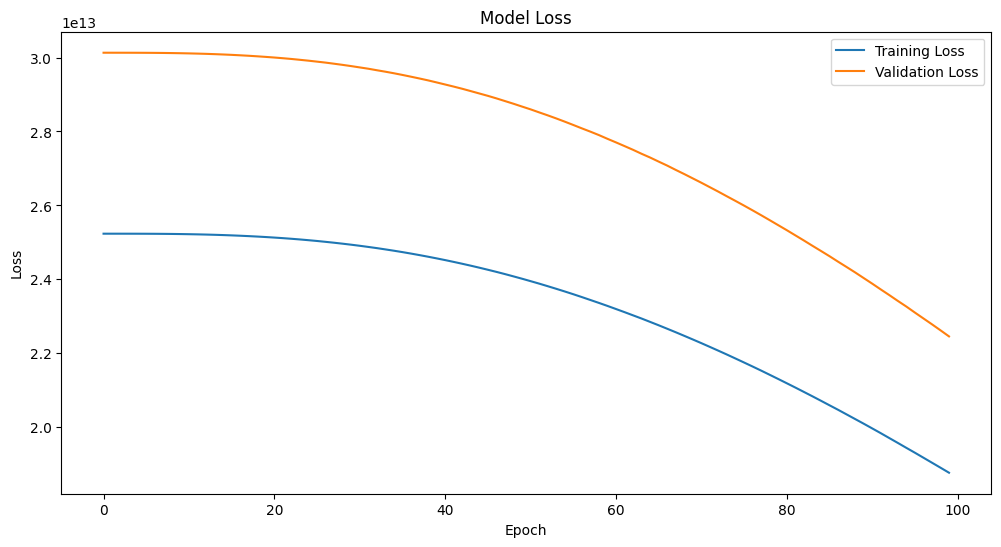

Final Training Loss: 18768954654720.0
Final Validation Loss: 22456467193856.0


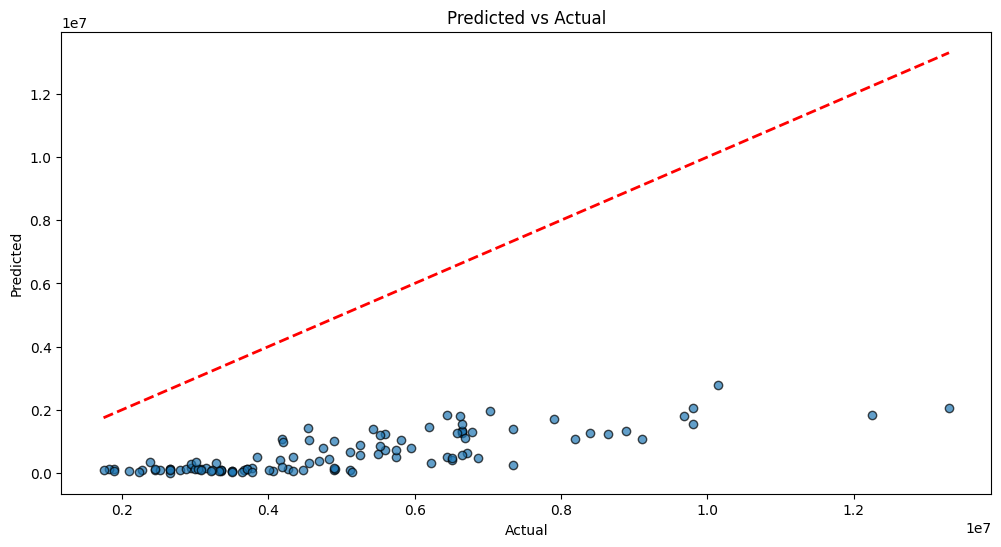

In [7]:
# Function to display results systematically
def display_results(history, model, X_test, y_test, predictions):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()
    
    # Calculate and print final losses
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f'Final Training Loss: {train_loss}')
    print(f'Final Validation Loss: {val_loss}')
    
    # Plot predictions vs actual values
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, predictions, edgecolor='k', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual')
    plt.show()

# Call the function to display the results
display_results(history, model, X_test, y_test, predictions)

### Plot Residuals

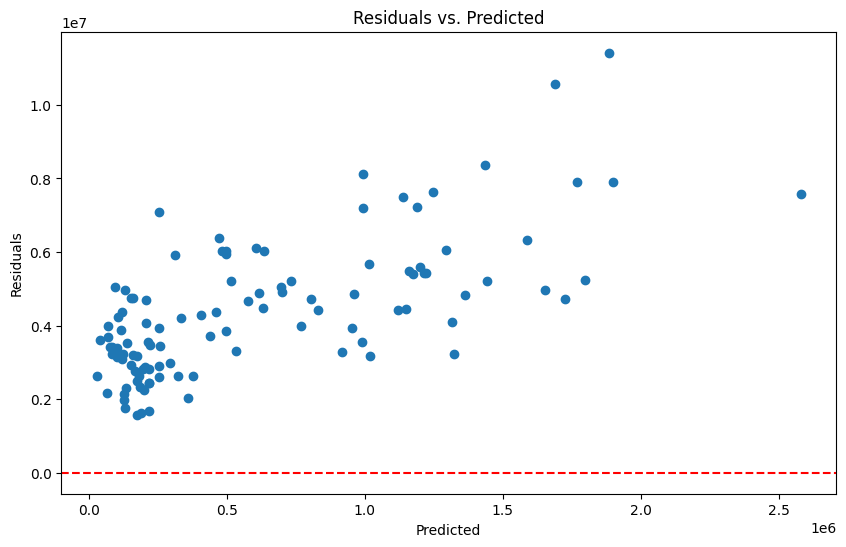

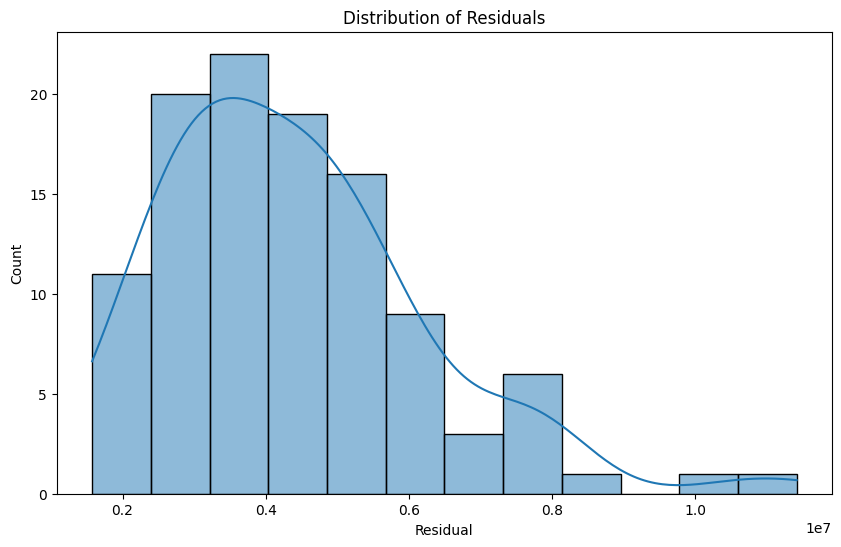

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import numpy as np
import seaborn as sns

# Plot residuals
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()
